# 위치로 속도 추정에 칼만필터 사용하기(등속도 운동)
100m/s로 직선 등속도 운동을 하는 물체의 위치 데이터를 기반(분산 10)으로 속도를 얻어오기
<br>
$x = \begin{bmatrix}l\\ v\end{bmatrix}, \ \ l=위치, \ \ v=속도$
<br>
$l_{k+1} = l_k + v_k*\Delta t$
<br>
$v_{k+1} = v_k + w_k, \ \ w_k= system \ noise$
<br>
$x_{k+1} = Ax_k + w_k$
<br>
$\begin{bmatrix} l \\ v \end{bmatrix}_{k+1} = \begin{bmatrix} 1&\Delta t \\ 0 & 1 \end{bmatrix} \begin{bmatrix} l \\ v \end{bmatrix} + \begin{bmatrix} 0 \\ w_k \end{bmatrix}$
<br>
$z_k = Hx_k + v_k, \ \ v_k=measurement \  noise$
<br>
위치만 측정되었으므로
<br>
$z_k = \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} l \\ v \end{bmatrix}_k + v_k$
<br>
$H = \begin{bmatrix} 1 & 0 \end{bmatrix}$
<br>
$Q = \begin{bmatrix} 1 & 0 \\ 0 & 3 \end{bmatrix}$
<br>
$R = 10$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
np.random.seed(2023)

In [2]:
z_data = []
vel_data = []
pos_data = []
pos = 0

for _ in range(100):
    w = np.random.normal(0, np.sqrt(10))
    v = np.random.normal(0, np.sqrt(10))
    vel = 100 + w
    pos = pos + vel*1
    z = pos + v
    z_data.append(z)
    vel_data.append(vel)
    pos_data.append(pos)



In [45]:
dt = 1
A = np.array([[1, dt], [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[1, 0], [0, 3]])
R = np.array([[10]])
x0 = np.array([0, 20]) # 0m, 50m/s로 초기화
P0 = 5*np.eye(2)

time = [i for i in range(1, 101)]
pos_lst = np.zeros(100)
_pos_lst = np.zeros(100)
vel_lst = np.zeros(100)
_vel_lst = np.zeros(100)

_x = x0
_P = P0

for i in range(100):
    z = z_data[i]
    vel = vel_data[i]
    pos = pos_data[i]
    x = A @ _x
    P = A @ _P @ A.T + Q

    K = P @ H.T @ inv(H @ P @ H.T + R)

    _x = x + K @ (z - H @ x)
    _P = P - K @ H @ P
    pos_lst[i] = z
    _pos_lst[i] = _x[0]
    vel_lst[i] = vel
    _vel_lst[i] = _x[1]
    


Text(0, 0.5, 'Velocity [m/s]')

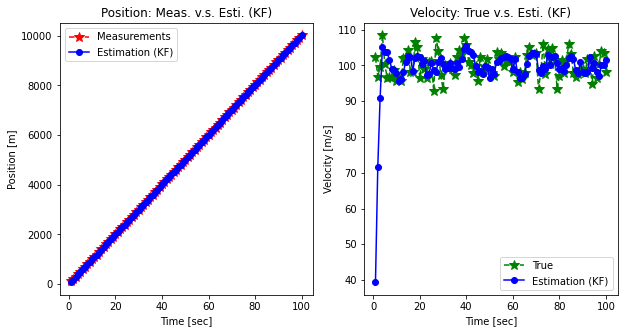

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(time, pos_lst, 'r*--', label='Measurements', markersize=10)
plt.plot(time, _pos_lst, 'bo-', label='Estimation (KF)')
plt.legend(loc='upper left')
plt.title('Position: Meas. v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Position [m]')

plt.subplot(1, 2, 2)
plt.plot(time, vel_lst, 'g*--', label='True', markersize=10)
plt.plot(time, _vel_lst, 'bo-', label='Estimation (KF)')
plt.legend(loc='lower right')
plt.title('Velocity: True v.s. Esti. (KF)')
plt.xlabel('Time [sec]')
plt.ylabel('Velocity [m/s]')
